# 01 Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
#defining path
path = r'C:\Users\User\OneDrive\Dokumentumok\CF\Phyton\Instacart Basket Analysis'

In [3]:
#importing data (customers.csv )
df = pd.read_pickle(r'C:\Users\User\OneDrive\Dokumentumok\CF\Phyton\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_merged_final.pkl')

# 03 Tasks

#### 03  Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [4]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spender_type', 'median_days_since_prior_order', 'customer_frequency',
       'First Name', 'Surname', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

Text(0.5, 0, 'order_time_of_day')

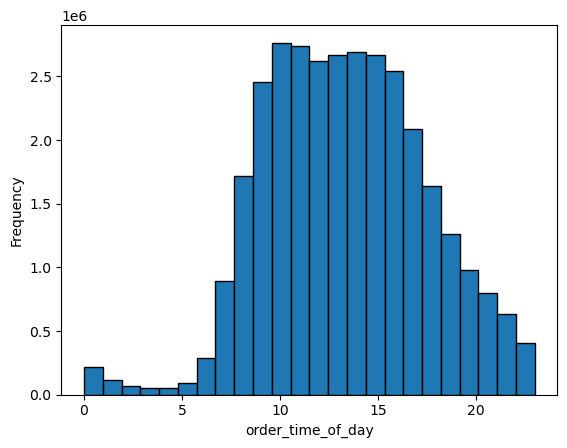

In [8]:
#create histogram
# Plot a histogram with contours on the bars
hist_hours = df['order_time_of_day'].plot.hist(bins = 24, edgecolor = 'black')
plt.xlabel('order_time_of_day')

In [9]:
#exporting plot
hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours.png'))

#### Descriprion of histogram
The orders begin to increase at 6:00 am and sharply surge until 10:00am where is the peak. 10:00-16:00 remain steady on a high level. Between 16:00 and 24:00 considerably decrease in number of orders. In the night 24:00-06:00 remains constatnly very low the sales. To sum up: people shop during the day, and sleep at night.

#### 04 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

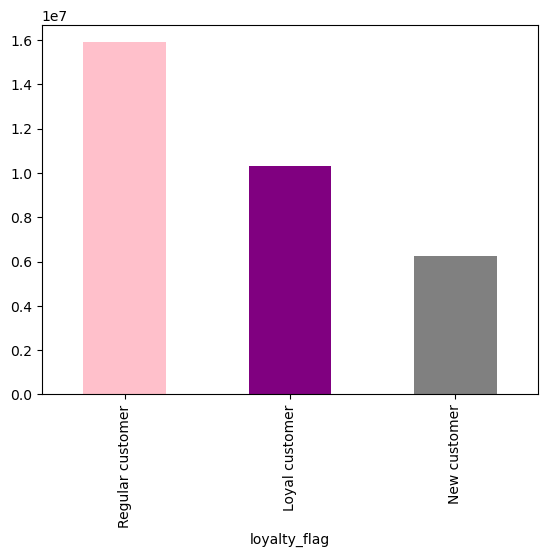

In [11]:
bar_loyality = df['loyalty_flag'].value_counts().plot.bar(color =['pink', 'purple', 'grey'])

In [12]:
#exporting plot
bar_loyality.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyality.png'))

####  05 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [13]:
#creating sample
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
#split dataframe into two samples
#70% of ords_prods_merge into df. big
big = df[dev]

In [15]:
#30% of ords_prods_merge into df. small
small = df[~dev]

In [16]:
#checking the number of rows
len(df)

32435059

In [17]:
len(big) + len(small)

32435059

In [18]:
#reducing your samples to only those columns necessary for the chart
df_sample = small[['order_time_of_day','prices']]

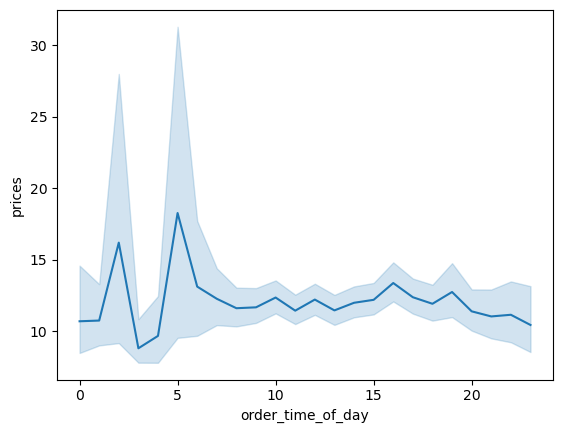

In [19]:
#create a line chart on the sample
line = sns.lineplot(data = df_sample, x = 'order_time_of_day',y = 'prices')

In [20]:
#exporting plot
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_hours_prices.png'))

#### 06 determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [22]:
#reducing your samples to only those columns necessary for the chart
df_sample2 = small[['Age','n_dependants']]

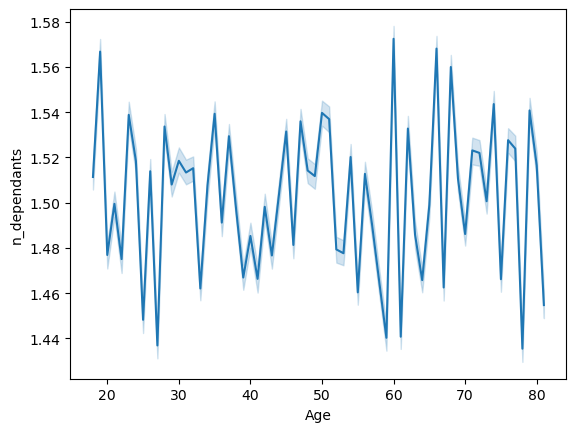

In [23]:
#create a line chart on the sample
line_family = sns.lineplot(data = df_sample2, x = 'Age',y = 'n_dependants')

The fluctuation of the chart is dramatic. There are no correlation between the age and the number of dependents

In [24]:
#exporting plot
line_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_age_family.png'))

#### 07 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [25]:
#reducing your samples to only those columns necessary for the chart
df_sample3 = small[['Age','income']]

In [28]:
df_sample3.dtypes

Age       int64
income    int64
dtype: object

<Axes: xlabel='Age', ylabel='income'>

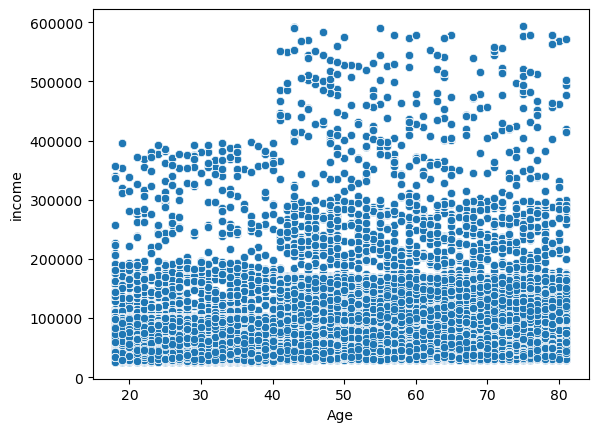

In [26]:
#create scatterplot
sns.scatterplot(x = 'Age', y = 'income',data = df_sample3)

A real decision line is found at the age of 41, and high incomes are observed in customers aged 41 and older.

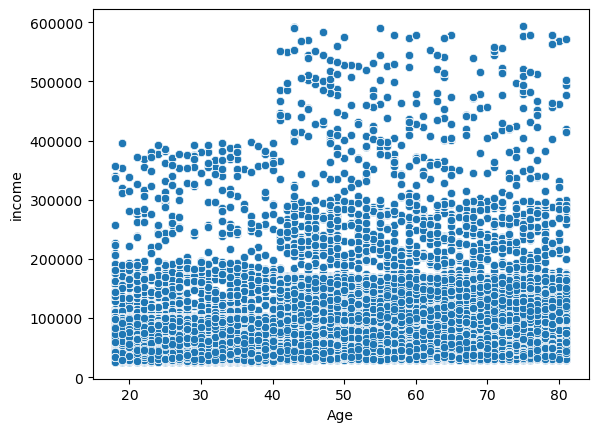

In [29]:
#exporting plot
scpl = sns.scatterplot(x = 'Age', y = 'income',data = df_sample3)
scpl.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))